## Homework 004. Creating diagrams

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns

### Task 1
Complete following tasks by creating graphs.

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Investigate prices

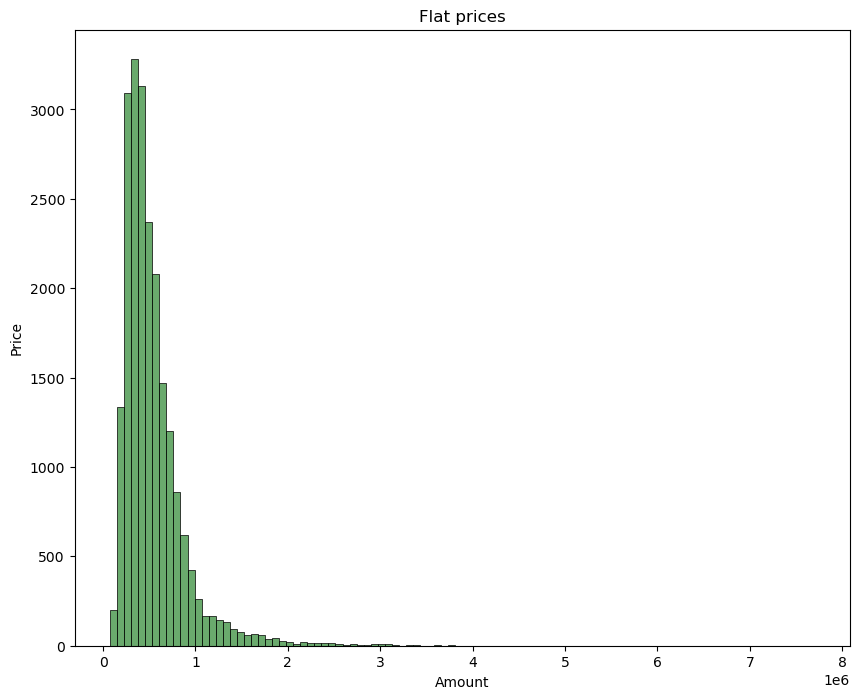

In [4]:
plt.figure(figsize=(10, 8))
sns.histplot(df['price'], bins=100, color='#388E3C')
plt.xlabel("Amount")
plt.ylabel("Price")

plt.title("Flat prices");

1.3 Study the distribution of the residential squaring.

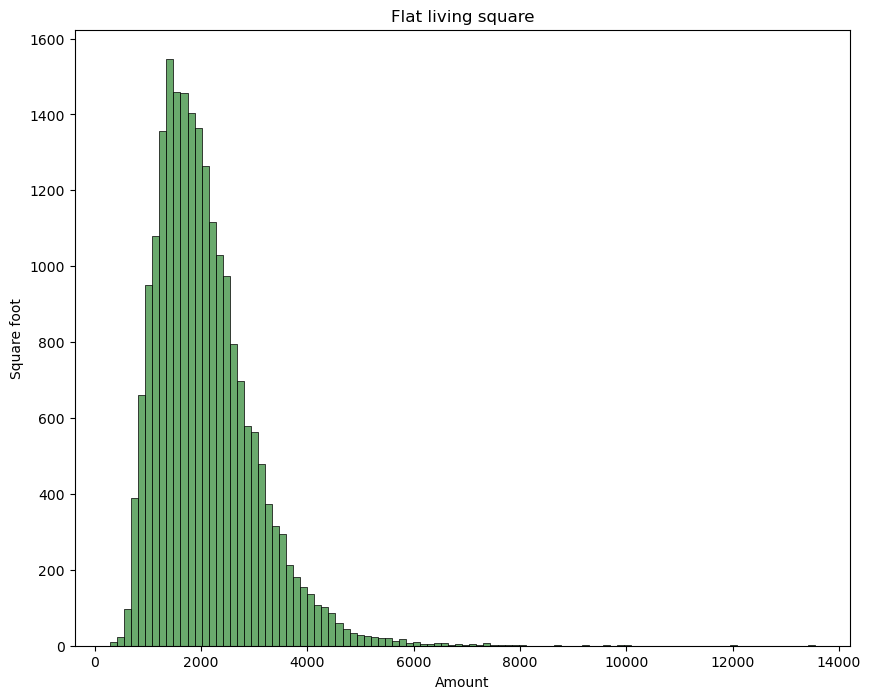

In [5]:
plt.figure(figsize=(10, 8))
sns.histplot(df['sqft_living'], bins=100, color='#388E3C')
plt.xlabel("Amount")
plt.ylabel("Square foot")

plt.title("Flat living square");

1.4 Study the distribution of the year of construction

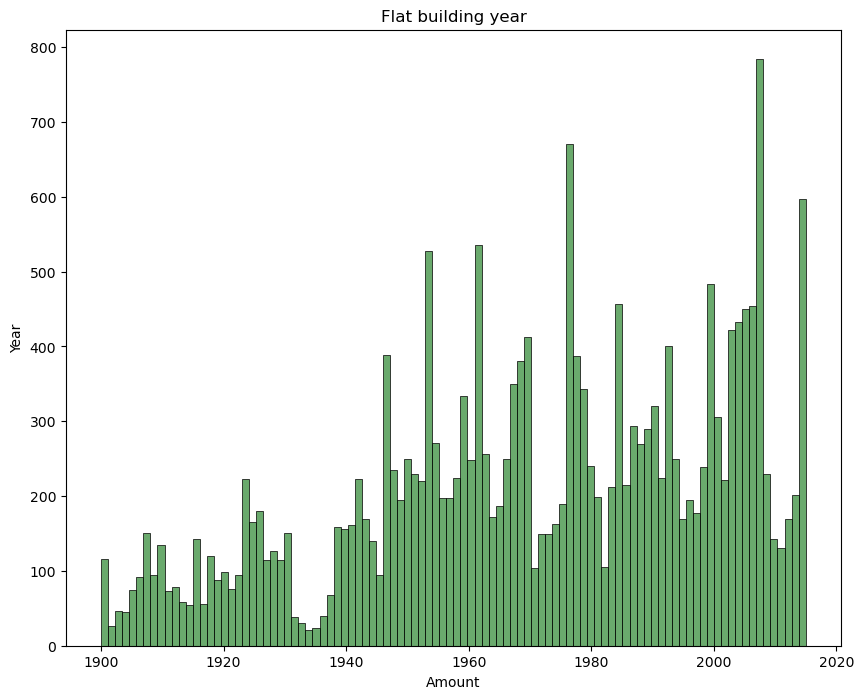

In [6]:
plt.figure(figsize=(10, 8))
sns.histplot(df['yr_built'], bins=100, color='#388E3C')
plt.xlabel("Amount")
plt.ylabel("Year")

plt.title("Flat building year");

### Task 2
2.1 Study the distribution of houses depending on the availability of a view of the waterfront

In [7]:
df['waterfront'] = df['waterfront'].apply(lambda content: 'No' if content == 0 else 'Yes')
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19944,2423069039,20140806T000000,650000.0,3,2.50,2500,51836,1.0,No,0,...,9,1510,990,2013,0,98027,47.4694,-121.989,2270,54450
5793,1125069134,20150430T000000,825000.0,3,2.25,2980,86636,1.0,No,0,...,9,2230,750,1989,0,98053,47.6627,-122.003,2980,107157
155,8960000030,20140728T000000,215000.0,3,1.00,1180,7669,1.0,No,0,...,7,1180,0,1967,0,98058,47.4479,-122.176,1190,7669


In [8]:
waterfront = df['waterfront'].value_counts()
waterfront_names = waterfront.index
waterfront_values = waterfront.values
waterfront.head()

No     21450
Yes      163
Name: waterfront, dtype: int64

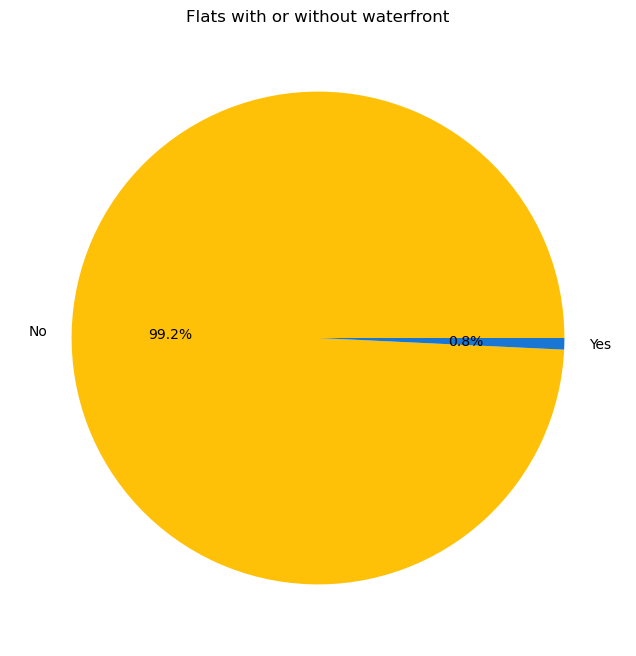

In [9]:
plt.figure(figsize=(10, 8))

plt.pie(waterfront_values, labels=waterfront_names, autopct='%1.1f%%', colors=['#FFC107', '#1976D2'])
plt.title('Flats with or without waterfront');

2.2 Study the distribution of floors of houses

In [10]:
floors = df['floors'].value_counts()
floors_names = floors.index
floors_values = floors.values
floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

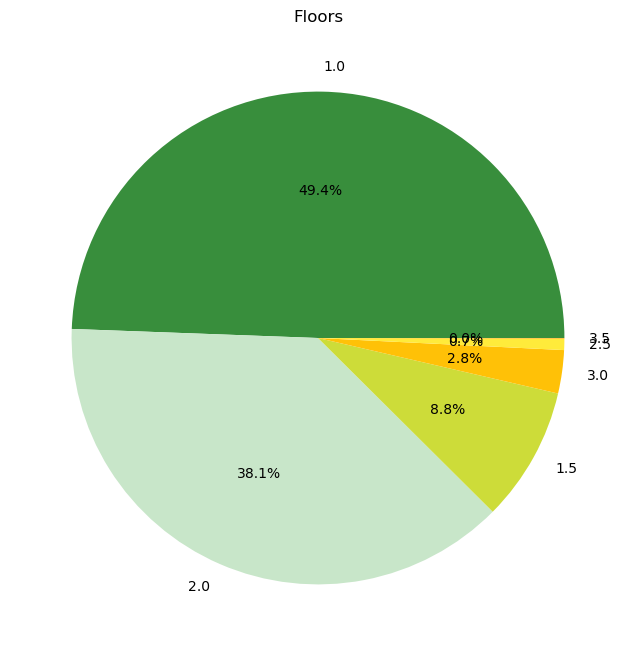

In [11]:
plt.figure(figsize=(10, 8))

plt.pie(floors_values, labels=floors_names, autopct='%1.1f%%', colors=['#388E3C', '#C8E6C9', '#CDDC39', '#FFC107', '#FFEB3B', '#FFA000',])
plt.title('Floors');

2.2 Study the distribution of the condition of houses

In [12]:
condition = df['condition'].value_counts()
condition_names = condition.index
condition_values = condition.values
condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

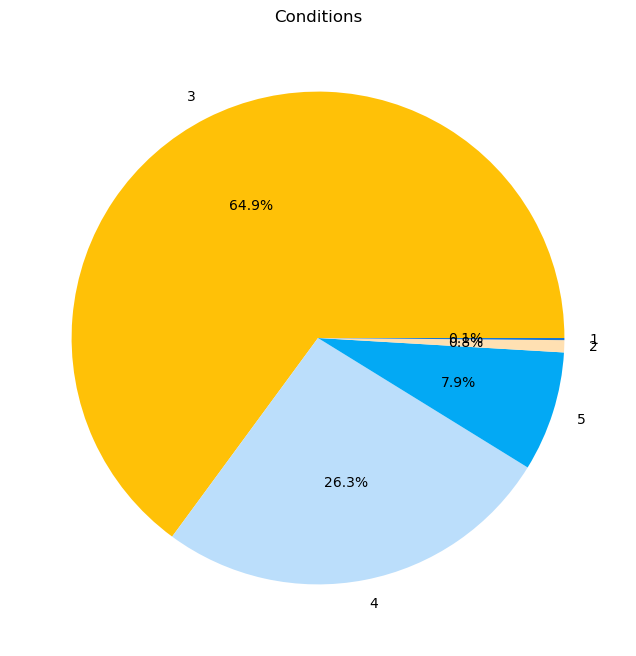

In [14]:
plt.figure(figsize=(10, 8))

plt.pie(condition_values, labels=condition_names, autopct='%1.1f%%', colors=['#FFC107', '#BBDEFB', '#03A9F4', '#FFE0B2', '#1976D2'])
plt.title('Conditions');

### Task 3
Explore what characteristics of real estate affect the value of real estate, using at least 5 diagrams from the lesson.<br>
Do the analysis in storytelling format.

In [15]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0


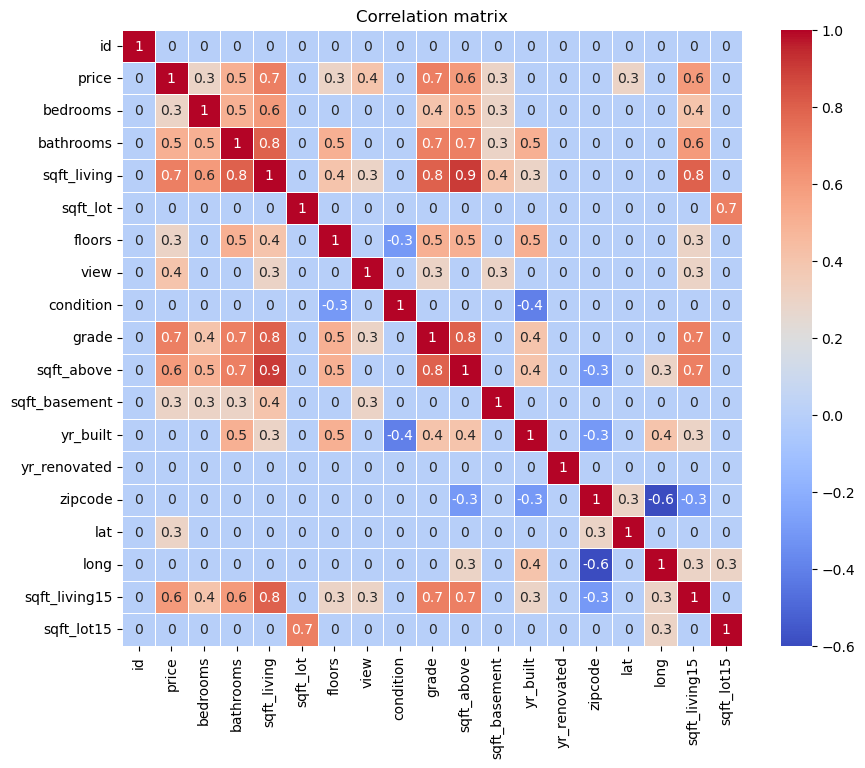

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

In [17]:
df_num_features = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'price']]

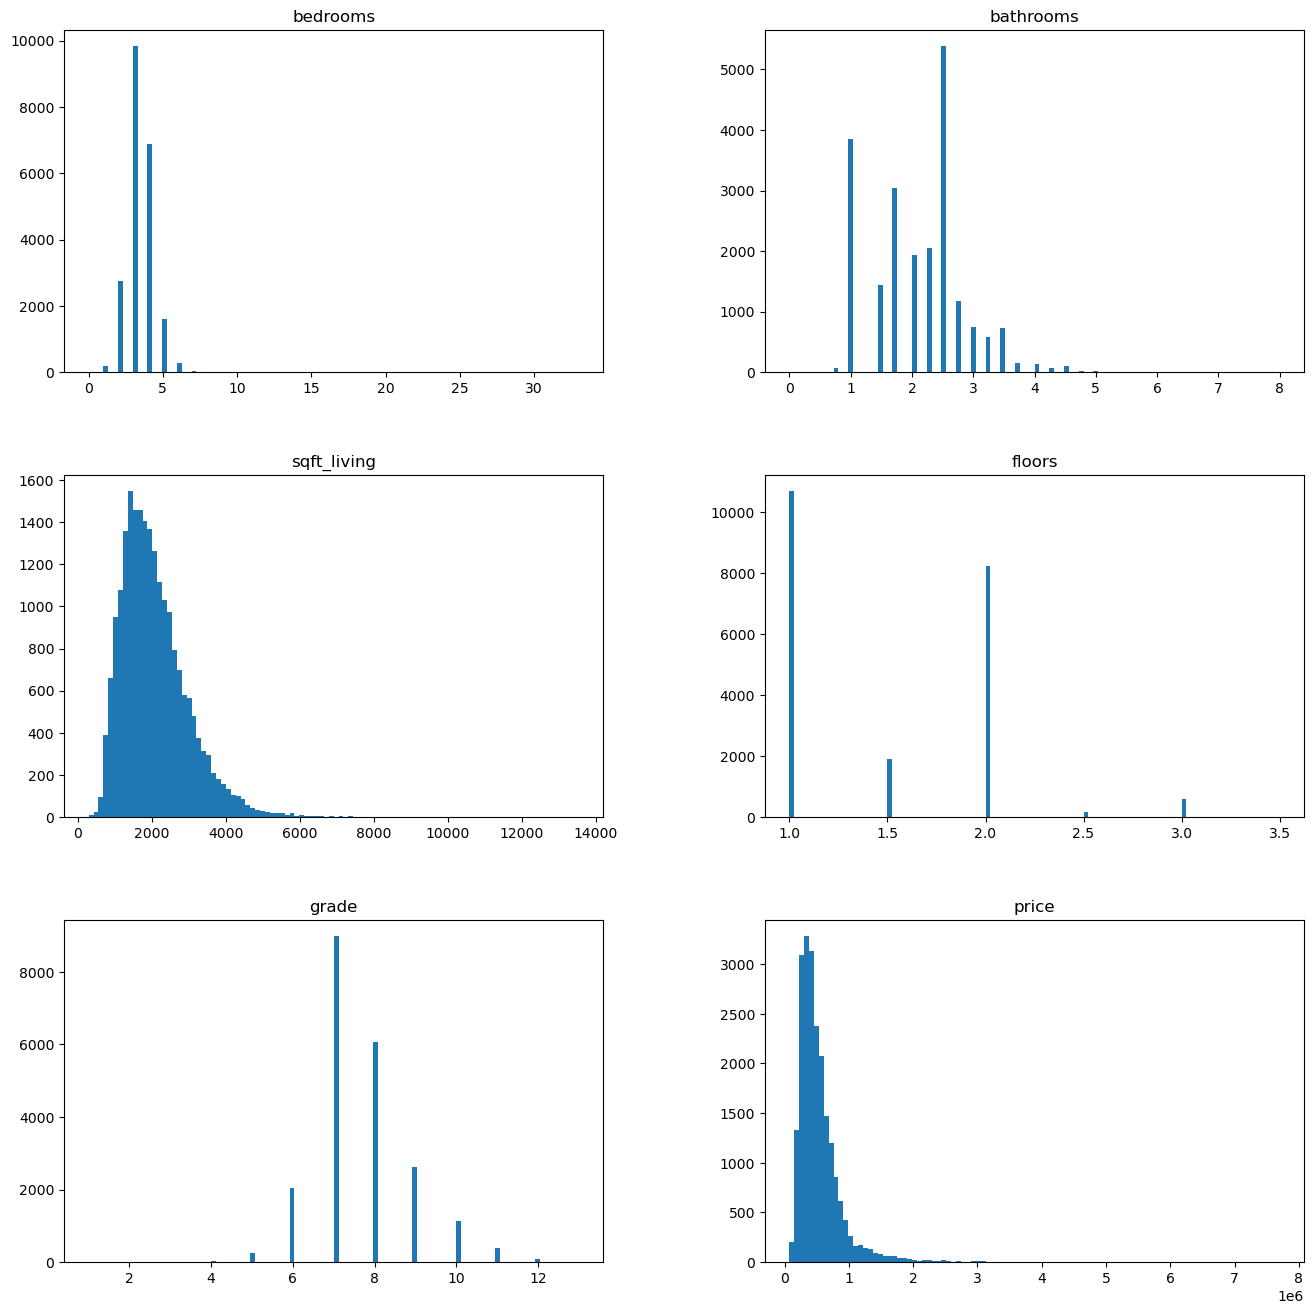

In [18]:
df_num_features.hist(figsize=(16, 16), bins=100, grid=False);

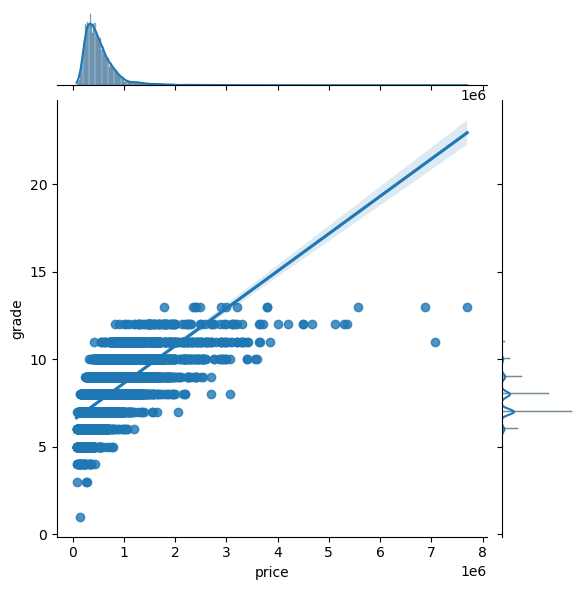

In [19]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

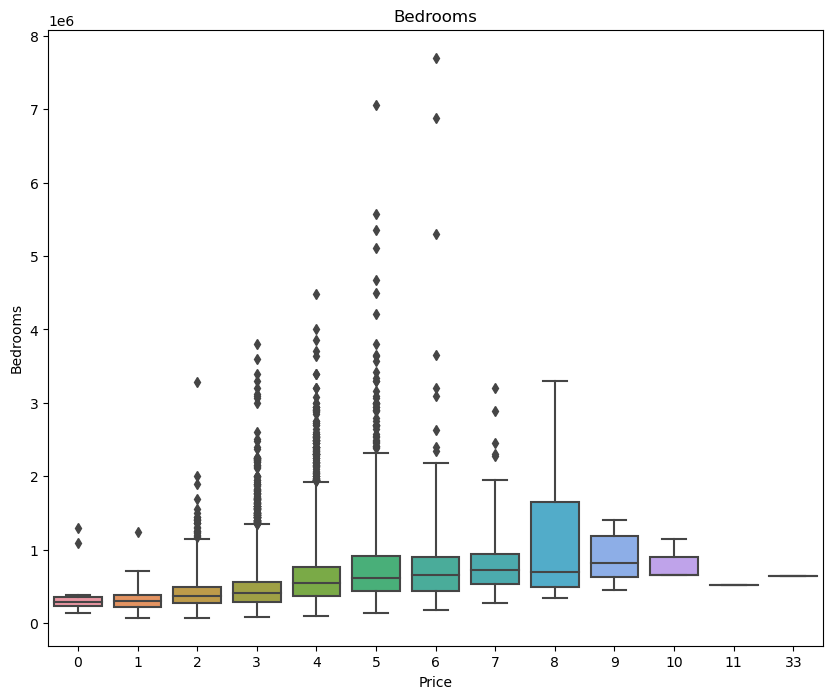

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['bedrooms'], y=df['price'], whis=3)
plt.title('Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms');

Most of all, the price depends on the grade and living space, to an average extent on the number of bathrooms and least of all on the number of rooms. The price does not depend on the condition, year of construction and year of renovation.